# NLP project

In [1]:
import pandas as pd
import os

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
!python download_data.py

In [3]:
data = pd.read_json("data/art.json.gz.zip", lines= True, compression= "gzip")

#pd.read_json("Arts_Crafts_and_Sewing_5.json", lines= True)

In [4]:
data.head(5)

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,4,True,"03 29, 2016",AIE8N9U317ZBM,0449819906,{'Format:': ' Kindle Edition'},"Zelmira, Ph.D.",Contains some interesting stitches.,Four Stars,1459209600,NaN,NaN
1,5,True,"08 12, 2015",A3ECOW0TWLH9V6,0449819906,{'Format:': ' Paperback'},Dangerous when Cooking,I'm a fairly experienced knitter of the one-co...,My current favorite go-to guide for inspiration,1439337600,18,NaN
2,4,True,"04 5, 2015",A278N8QX9TY2OS,0449819906,{'Format:': ' Paperback'},Just us,Great book but the index is terrible. Had to w...,"lots of great examples, good instructions, col...",1428192000,3,NaN
3,5,True,"10 11, 2014",A123W8HIK76XCN,0449819906,{'Format:': ' Kindle Edition'},Amazon Customer,I purchased the Kindle edition which is incred...,Another little gem by Melissa Leapman,1412985600,NaN,NaN
4,5,True,"05 8, 2014",A2A6MZ2QB4AE0L,0449819906,{'Format:': ' Paperback'},Sustainability,Very well laid out and very easy to read.\n\nT...,Very comprehensive,1399507200,NaN,NaN


In [40]:
data.shape

(494485, 12)

In [13]:
data.columns

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin', 'style',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'image'],
      dtype='object')

In [14]:
data.dtypes

overall            int64
verified            bool
reviewTime        object
reviewerID        object
asin              object
style             object
reviewerName      object
reviewText        object
summary           object
unixReviewTime     int64
vote              object
image             object
dtype: object

In [ ]:
data['style'].nunique

#### Let's focus on the `overall` variable, namely the ratings of the products

In [6]:
data.overall.describe()

count    494485.000000
mean          4.566852
std           0.929987
min           1.000000
25%           5.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: overall, dtype: float64

The distribution is highly concentrated on the right, with more than 75% of the sample with the value 5 (out of 5). Overall, people seem to be very satisfied with the products.

In [12]:
data.overall.unique()

array([4, 5, 2, 3, 1])

In [10]:
sns.set(palette="GnBu_d")

Text(0.5, 1.0, 'Overall distribution')

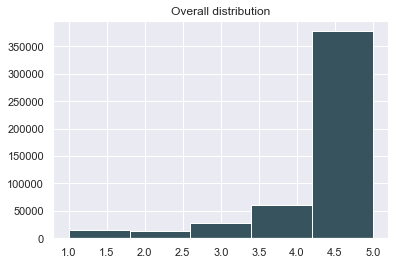

In [212]:
data.overall.hist(bins = 5)
plt.title('Overall distribution')

### Changing the type of some columns for exploratory work

In [16]:
data['reviewTime'] = pd.to_datetime(data.reviewTime)

Text(0.5, 1.0, 'Period of the reviews ?')

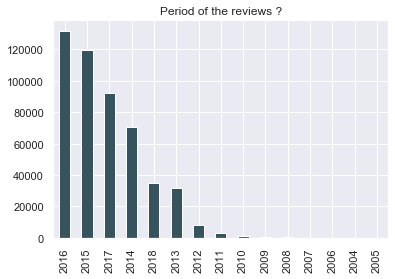

In [61]:
data.reviewTime.dt.year.value_counts(dropna=False).plot(kind='bar')
plt.title("Period of the reviews ?")

Text(0.5, 1.0, 'Is there a seasonality for the reviews ?')

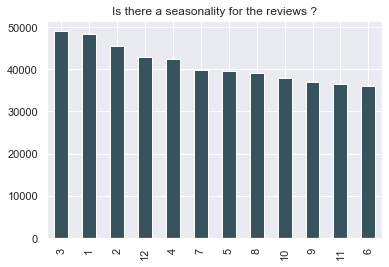

In [62]:
data.reviewTime.dt.month.value_counts(dropna=False).plot(kind='bar')
plt.title('Is there a seasonality for the reviews ?')

People comment throughout the year, there's no specific seasonal trend for client's behavior.

#### A closer look on the `vote` variable : will it be useful for our classification ?

`Vote` variable : on Amazon website, the more votes a comment gets, the more it is useful for the community. One approach of our classification could be to analyse whether reviews with the highest votes are rather positive, neutral, negative ?  

In [31]:
data['vote'] = pd.to_numeric(data['vote'], errors='coerce')

In [39]:
data.vote.describe()

count    71007.000000
mean         7.882800
std         21.572504
min          2.000000
25%          2.000000
50%          3.000000
75%          7.000000
max        903.000000
Name: vote, dtype: float64

In [53]:
data.vote[data.vote > 7].describe()

count    15375.000000
mean        24.584976
std         42.252494
min          8.000000
25%         10.000000
50%         13.000000
75%         23.000000
max        903.000000
Name: vote, dtype: float64

Text(0.5, 1.0, 'Votes distribution')

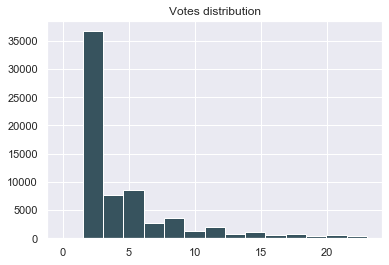

In [63]:
data.vote.hist(range = (0,23), bins = 15)
plt.title('Votes distribution')

##### Let's look on the `style`variable. 

In [215]:
data['style'] = data['style'].astype(str)

In [216]:
data['style'].nunique()

18104

In [223]:
data['style'].value_counts(normalize = True)[0:5]

nan                                0.528532
{'Size:': ' 1 Pack'}               0.030132
{'Package Quantity:': ' 1'}        0.012993
{'Color:': ' White'}               0.008298
{'Color:': ' Original Version'}    0.008263
Name: style, dtype: float64

#### How many reviewers ? 

How many reviewers in this dataset ? Are people who give ratings more likely to be more active on the site ? 

In [228]:
data.reviewerName.value_counts(normalize = True)

Amazon Customer                0.054989
Kindle Customer                0.009285
Linda                          0.001400
Mary                           0.001135
Karen                          0.001116
                                 ...   
Angelique hopeless romantic    0.000002
Rbd                            0.000002
AA888                          0.000002
SoCalMom                       0.000002
Groovyeli                      0.000002
Name: reviewerName, Length: 45478, dtype: float64

In [231]:
print('Percentage of unique reviewers', data.reviewerName.nunique()/len(data.reviewerName))

Percentage of unique reviewers 0.09197043388575993


Only 10% of recurrent clients : the dataset is rather diverse.

In [232]:
# Difference between reviewerId and reviewerName ? 

print('Percentage of unique IDs', data.reviewerID.nunique()/len(data.reviewerID))


Percentage of unique IDs 0.11367382225952254


*There's a slight difference between both variables (`reviewerID` and `reviewerName`) but the outcome stays the same: approximately 10% of recurrent customers.*

#### A closer look on the variable `image`

In [163]:
data.image = data.image.astype('str')

In [166]:
data.image.unique()

array(['nan',
       "['https://images-na.ssl-images-amazon.com/images/I/51zwvBnXUUL._SY88.jpg', 'https://images-na.ssl-images-amazon.com/images/I/51-LYgXa3IL._SY88.jpg', 'https://images-na.ssl-images-amazon.com/images/I/61P4n-DuUHL._SY88.jpg']",
       "['https://images-na.ssl-images-amazon.com/images/I/81IYFXKk9nL._SY88.jpg']",
       ...,
       "['https://images-na.ssl-images-amazon.com/images/I/81TIuYvYT3L._SY88.jpg']",
       "['https://images-na.ssl-images-amazon.com/images/I/81AO6zm4TLL._SY88.jpg']",
       "['https://images-na.ssl-images-amazon.com/images/I/810mLrCLwcL._SY88.jpg', 'https://images-na.ssl-images-amazon.com/images/I/71jlu07nvQL._SY88.jpg', 'https://images-na.ssl-images-amazon.com/images/I/815BNwkS0ZL._SY88.jpg', 'https://images-na.ssl-images-amazon.com/images/I/71ixu6Ied4L._SY88.jpg']"],
      dtype=object)

One lead for this variable would be to drive a parallel : do books with images have better comments ? 
Let's create a new `binary variable` (yes / no), such as yes is assigned if the comment is linked to a posting with a book, and no if the comment has no book image to support its rating.

In [178]:
data.image.nunique()

9344

The `image` variable may help us know how many different items were reviewed, and consider how many reviews there are per item. However let's check how many missing values there are too. If the number is too high, some exploratory work on this variable could be biased.

In [179]:
data.image.value_counts(normalize = True)

nan                                                                                                                                                                                                                                                                                                         0.978181
['https://images-na.ssl-images-amazon.com/images/I/61ner9BnsNL._SY88.jpg']                                                                                                                                                                                                                                  0.000020
['https://images-na.ssl-images-amazon.com/images/I/51K3XGymdgL._SY88.jpg']                                                                                                                                                                                                                                  0.000014
['https://images-na.ssl-images-amazon.com/images/I/81nAYHh40IL._SY88.jpg'

More than 97% of missing data, there's no point in considering this variable.

## Dealing with the text variables : `reviewText` and `summary`

In [38]:
data.reviewText.astype(str)

0                       Contains some interesting stitches.
1         I'm a fairly experienced knitter of the one-co...
2         Great book but the index is terrible. Had to w...
3         I purchased the Kindle edition which is incred...
4         Very well laid out and very easy to read.\n\nT...
                                ...                        
494480    What's not to love? The price. Watercolor pens...
494481                       lots of color in these markers
494482    These are really fun to use. I love watercolor...
494483    While the box says vibrant colors, only a few ...
494484    Core is very hard and does not transfer color ...
Name: reviewText, Length: 494485, dtype: object

In [64]:
data.summary.astype(str)

0                                                Four Stars
1           My current favorite go-to guide for inspiration
2         lots of great examples, good instructions, col...
3                     Another little gem by Melissa Leapman
4                                        Very comprehensive
                                ...                        
494480                                           Four Stars
494481                                           Five Stars
494482                            Very cool watercolor pens
494483             So little pigment the color barely shows
494484    Color on paper is not very saturated due to ha...
Name: summary, Length: 494485, dtype: object

In [71]:
print('the % of non-missing values for the reviewText column : ', 
      data.reviewText.count()/len(data.reviewText))
print('the % of non-missing values for the summary column : ', 
      data.summary.count()/len(data.summary))

the % of non-missing values for the reviewText column :  0.9994155535557195
the % of non-missing values for the summary column :  0.9997512563576246


There is almost no missing data for our text columns.

In [75]:
print(data.summary[4], data.reviewText[4])

Very comprehensive Very well laid out and very easy to read.

This book is also a nice size, not too big, but larger enough to use and see what is being presented.
Fair price for the product.


The `summary`variable resumes the comment of the user. 

### Tokenization and descriptive statistics

In [88]:
from collections import Counter
from nltk.tokenize import TreebankWordTokenizer
from operator import add
from functools import reduce

In [233]:
data.summary = data.summary.astype(str)
data.reviewText = data.reviewText.astype(str)

In [187]:
print('Le %  de summary distincts : ', len(data.summary.unique())/len(data.summary))
print('Le nombre de summary dans le dataset : ', len(data.summary))

Le %  de summary distincts :  0.39604436939442045
Le nombre de summary dans le dataset :  494485


In [182]:
print('Nombre moyen de caractères dans reviewText : ', data.reviewText.drop_duplicates().apply(len).mean())
print('Nombre moyen de caractères dans summary ', data.summary.drop_duplicates().apply(len).mean() )

Nombre moyen de caractères dans reviewText :  195.15210394530507
Nombre moyen de caractères dans summary  32.80974070405131


Text(0.5, 1.0, "Distribution of characters' length for summary variable")

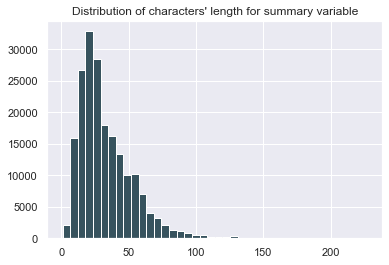

In [191]:
data.summary.drop_duplicates().apply(len).hist(bins = 40)
plt.title("Distribution of characters' length for summary variable")

count    195838.000000
mean         32.809741
std          19.804580
min           1.000000
25%          18.000000
50%          28.000000
75%          43.000000
max         227.000000
Name: summary, dtype: float64
------------------------------------------------
count    352647.000000
mean        195.152104
std         323.523182
min           1.000000
25%          48.000000
50%         108.000000
75%         215.000000
max       19323.000000
Name: reviewText, dtype: float64
------------------------------------------------


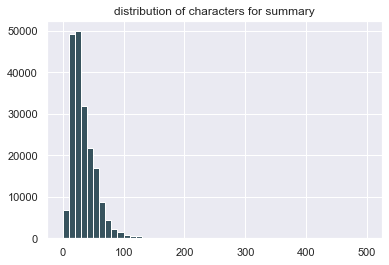

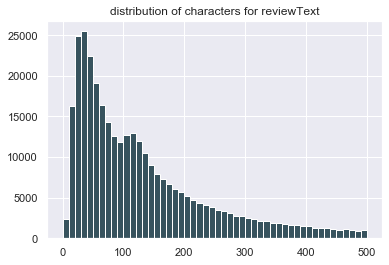

In [211]:
text = ('summary', 'reviewText')
for i in text: 
    plt.figure()
    plt.title("distribution of characters for {0}".format(i))
    data[i].drop_duplicates().apply(len).hist(bins = 50, range=(0,500))
    plt.plot()
    print(data[i].drop_duplicates().apply(len).describe())
    print('------------------------------------------------')


**Let's focus on the `summary` variable first**

In [90]:
arr = data.summary.drop_duplicates().apply(lambda x: TreebankWordTokenizer().tokenize(x)).array
#arr = reduce(add, arr)

In [141]:
test = reduce (add, arr[0:1000])

In [260]:
print('number of unique words in the first 1000 summaries : ', len(set(test)))

number of unique words in the first 1000 summaries :  1599


In [157]:
from collections import Counter
c = Counter(test)
df_freq = pd.DataFrame(c, index = ['Occurences']).transpose().reset_index()
df_freq.columns = ['word', 'occurences']
nb_total = df_freq.occurences.sum()
df_freq['freq'] = df_freq.occurences.apply(lambda x: x/nb_total)
df_freq = df_freq.sort_values('freq', ascending=False)

# The top 50 words
df_freq[0:50]
                       

,word,occurences,freq
36,!,218,0.036831
7,for,151,0.025511
46,the,132,0.022301
60,and,118,0.019936
88,I,114,0.019260
26,Great,107,0.018077
71,.,105,0.017739
70,...,98,0.016557
13,",",95,0.016050
57,a,93,0.015712


There's a problem with the commas, we should take them off.

In [173]:
df_freq

,word,occurences,freq
36,!,218,0.036831
7,for,151,0.025511
46,the,132,0.022301
60,and,118,0.019936
88,I,114,0.019260
...,...,...,...
766,razor,1,0.000169
768,attachment,1,0.000169
773,burnt,1,0.000169
776,right,1,0.000169


In [169]:
# Autre manière de présenter les top-common words

Counter(test).most_common(20)

[('!', 218),
 ('for', 151),
 ('the', 132),
 ('and', 118),
 ('I', 114),
 ('Great', 107),
 ('.', 105),
 ('...', 98),
 (',', 95),
 ('a', 93),
 ('to', 88),
 ('set', 88),
 ('of', 61),
 ('this', 60),
 ('good', 58),
 ('it', 57),
 ('great', 52),
 ('Good', 49),
 ('is', 43),
 ('but', 43)]

Conjunctions like `"for"`, words like `"a"`, `"it"`(?), and some punctuations are not useful at all. For our sentiment analysis model, we should have a clean dataset and remove unuseful tokens. Let's create that function in our tokenization step. 
Yet some tokens like `"!"` can remain as they testify of a sentiment, either positive or negative. One sure thing is that it isn't neutral.

**Note** :  
- find a way to plot it in a more appealing way
- extend it to the whole dataset (having trouble running it locally, try with Colab)

**Next steps**
- Keep on the work with analysing bigrams etc
- implement a k-means for initialization
- Create a function that cleans the data, namely removes all the unnecessary tokens. 

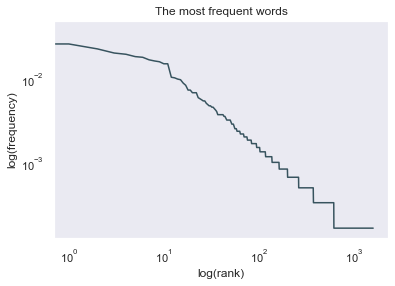

In [147]:
# not useful at all 

plt.figure()
plt.grid()
plt.xscale('log')  # Using log scale
plt.yscale('log')  # Using log scale
plt.xlabel('log(rank)')
plt.ylabel('log(frequency)')
plt.title("The most frequent words")
x = list(range(df_freq.shape[0]))
plt.plot(x, df_freq.freq)
plt.show()

**Let's now focus on the `reviewText` variable**

In [234]:
review_tok = data.reviewText.drop_duplicates().apply(lambda x: TreebankWordTokenizer().tokenize(x)).array

In [249]:
review_list = reduce(add, review_tok[0:3000])

In [259]:
print('number of words in the 1000 first reviews : ', len(set(review_list)))

number of words in the 1000 first reviews :  10614


In [257]:
counter = Counter(review_list)
df_freq_review = pd.DataFrame(counter, index = ['Occurences']).transpose().reset_index()
df_freq_review.columns = ['word', 'occurences']
nb_total = df_freq_review.occurences.sum()
df_freq_review['freq'] = df_freq_review.occurences.apply(lambda x: x/nb_total)
df_freq_review = df_freq_review.sort_values('freq', ascending=False)

# The top 50 words
df_freq_review[0:50]

,word,occurences,freq
12,the,4525,0.034304
5,I,4477,0.033940
19,",",3755,0.028467
25,and,3483,0.026405
45,to,3253,0.024661
7,a,2821,0.021386
4,.,2001,0.015170
152,for,1999,0.015155
239,it,1865,0.014139
11,of,1845,0.013987


**Note** 
- choose which token to keep, and which to get rid off (prepositions, commas, brackets, etc)
- create a function that cleans the data

Indeed most common words are useless words and we may lose some precious information or efficiency for the model. 

Also, is TreebankTokenizer best suited for our model or should we test some others ? 